#### Answers submitted by:  Joseph Hamilton
#### Date:  December 9, 2017  
---

# Python Part 3:  Pandas Exercises
# Metis Bootcamp Prework - 05c Intro to Pandas
## Data Exploration - Olive Dataset
---

## Q1:  Read in the libraries you need

In [1]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [2]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [3]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.20.3
Numpy version: 1.13.3


In [5]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 3.6.3 |Anaconda, Inc.| (default, Oct 13 2017, 12:02:49) 
[GCC 7.2.0]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [6]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [8]:
 print("There are %d rows and %d columns" % df.shape)

There are 572 rows and 11 columns


## Q6:  Print the first 4 rows of the data

In [16]:
print(df[:4])

       Unnamed: 0  region  area  palmitic  palmitoleic  stearic  oleic  \
0  1.North-Apulia       1     1      1075           75      226   7823   
1  2.North-Apulia       1     1      1088           73      224   7709   
2  3.North-Apulia       1     1       911           54      246   8113   
3  4.North-Apulia       1     1       966           57      240   7952   

   linoleic  linolenic  arachidic  eicosenoic  
0       672         36         60          29  
1       781         31         61          29  
2       549         31         63          29  
3       619         50         78          35  


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [25]:
set(df.dtypes)

{dtype('int64'), dtype('O')}

## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [26]:
df['sub_region_raw'] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [41]:
df.rename(columns={'Unnamed: 0':'sub_region_desc'}, inplace=True)

## Q10:  Rename the column 'area' to:  'sub_region'

In [43]:
df.rename(columns={'area':'sub_region'}, inplace=True)

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [45]:
set(df['region'])

{1, 2, 3}

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [70]:
 set(df['sub_region'])

{1, 2, 3, 4, 5, 6, 7, 8, 9}

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [47]:
 set(df['sub_region_desc'])

{'1.North-Apulia',
 '10.North-Apulia',
 '100.South-Apulia',
 '101.South-Apulia',
 '102.South-Apulia',
 '103.South-Apulia',
 '104.South-Apulia',
 '105.South-Apulia',
 '106.South-Apulia',
 '107.South-Apulia',
 '108.South-Apulia',
 '109.South-Apulia',
 '11.North-Apulia',
 '110.South-Apulia',
 '111.South-Apulia',
 '112.South-Apulia',
 '113.South-Apulia',
 '114.South-Apulia',
 '115.South-Apulia',
 '116.South-Apulia',
 '117.South-Apulia',
 '118.South-Apulia',
 '119.South-Apulia',
 '12.North-Apulia',
 '120.South-Apulia',
 '121.South-Apulia',
 '122.South-Apulia',
 '123.South-Apulia',
 '124.South-Apulia',
 '125.South-Apulia',
 '126.South-Apulia',
 '127.South-Apulia',
 '128.South-Apulia',
 '129.South-Apulia',
 '13.North-Apulia',
 '130.South-Apulia',
 '131.South-Apulia',
 '132.South-Apulia',
 '133.South-Apulia',
 '134.South-Apulia',
 '135.South-Apulia',
 '136.South-Apulia',
 '137.South-Apulia',
 '138.South-Apulia',
 '139.South-Apulia',
 '14.North-Apulia',
 '140.South-Apulia',
 '141.South-Apulia',

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [67]:
df['sub_region_desc'] = df['sub_region_desc'].str.replace(r'\d+.','')

In [68]:
df.head()

,sub_region_desc,region,sub_region,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic,sub_region_raw
0,North-Apulia,1,1,1075,75,226,7823,672,36,60,29,1.North-Apulia
1,North-Apulia,1,1,1088,73,224,7709,781,31,61,29,2.North-Apulia
2,North-Apulia,1,1,911,54,246,8113,549,31,63,29,3.North-Apulia
3,North-Apulia,1,1,966,57,240,7952,619,50,78,35,4.North-Apulia
4,North-Apulia,1,1,1051,67,259,7771,672,50,80,46,5.North-Apulia


## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [69]:
  set(df['sub_region_desc'])

{'Calabria',
 'Coast-Sardinia',
 'East-Liguria',
 'Inland-Sardinia',
 'North-Apulia',
 'Sicily',
 'South-Apulia',
 'Umbria',
 'West-Liguria'}

## Q16:   Create a horizontal frequency barplot for 'region'

Text(0.5,1,'Horizontal Frequency Barplot of Region')

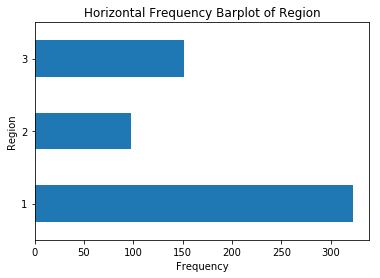

In [121]:
df['region'].value_counts(sort=False).plot(kind='barh')
plt.xlabel("Frequency")
plt.ylabel("Region")
plt.title("Horizontal Frequency Barplot of Region")

## Q17:   Create a horizontal frequency barplot for 'sub_region'

Text(0.5,1,'Horizontal Frequency Barplot of Subregion')

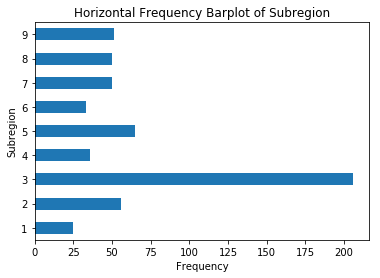

In [123]:
 df['sub_region'].value_counts(sort=False).plot(kind='barh')
plt.xlabel("Frequency")
plt.ylabel("Subregion")
plt.title("Horizontal Frequency Barplot of Subregion")

## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

Text(0.5,1,'Horizontal Frequency Barplot of Subregion')

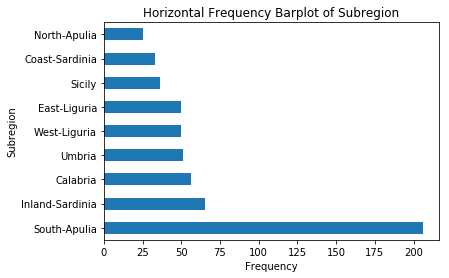

In [125]:
df['sub_region_desc'].value_counts().plot(kind='barh')
plt.xlabel("Frequency")
plt.ylabel("Subregion")
plt.title("Horizontal Frequency Barplot of Subregion")